In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pyspark


In [0]:
# df = spark.read.table('aa_claims.lar_v002')
df = spark.read.table('acn_ess_lit_mgmt_dev.acn_like_claims_input')

df = df.toPandas()
df.display()


/databricks/spark/python/pyspark/sql/pandas/utils.py:79: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [claim_id, exposurelimit, incidentlimit, deductible, exposure_sublimit_expense, exposure_sublimit_indemnity, estimatedseverity_ext, totalconsidered_ext, totalsubmitted_ext, claimantliability_pct, otherliability_pct, max_demand, attorneyrepresented_ext] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
 warnings.warn(

claim_number,claim_id,exposure_id,paid_indemnity,policy_type,loss_type,lossparty,coverage_subtype_desc,covtypecode,exposurelimit,incidentlimit,deductible,exposure_sublimit_expense,exposure_sublimit_indemnity,max_initial_reserve_amount,new_LOB,new_sublob,estimatedseverity_ext,claimant_name,coverage_category,fault_rating,claim_closed_date,reported_date,suit_filed_dt_claim,loss_state,policystate,cnt_days_loss_fnol,totalconsidered_ext,totalsubmitted_ext,insuredliability_pct,claimantliability_pct,otherliability_pct,col_category,loss_cause_desc,claim_sub_department,max_demand,claim_department,business_unit,uw_department_name,paid_expense_litigation,claim_status,paid_expense,attorneyrepresented_ext,cnt_clmants_file,cnt_clmant_exposures,abuse_flag,fatality_flag,time_limited_demand_flag,controversial_media_attention_flag,heat_flag,explosion_flag,claims_leadership_trigger_flag,case_in_default_flag,coverage_denial_flag,coverageb_flag,no_contractual_indemnity_flag,adverse_party_devl_flag,dec_action_flag,tpa_involvement_flag,high_exposure_flag,party_issues_flag,judgement_issues_flag,keywords_flag,any_primary,ttl_cnt_related_claims,assoc_relation,cnt_prev_claims,plaintiff_counsel_name,matter_count,matter_cd_def_count,matter_cd_cov_count,matter_cd_oth_count,matter_type_suit_count,matter_type_covnonsuit_count,matter_type_arbi_count,matter_type_presuit_count,matter_type_admin_count,matter_subtype_covop_count,matter_subtype_medi_count,matter_subtype_subroreco_count,matter_subtype_griev_count,matter_subtype_dedreco_count,matter_subtype_civilrem_count,matter_subtype_examoath_count,matter_subtype_addtldef_count,matter_subtype_contribreco_count,matter_subtype_sirreco_count,matter_subtype_extracontract_count,matter_subtype_investigation_count,matter_subtype_covadvice_count,matter_subtype_covmonitor_count,matter_subtype_covinvestigation_count,matter_subtype_reco_count,matter_subtype_covdeclajudg_count,matter_subtype_other_count,matter_subtype_insudef_count,matter_subtype_appraisal_count,matter_subtype_subpoena_count,matter_subtype_covdef_count
01486686,1312112.0000000000,1738243,1110091.8,Excess Liability,Liability,Third-party liability,Bodily Injury,509,9000000.00,9000000.00,0.00,null,null,10000.0,Casualty,Excess,null,Floyd Hatley,Bodily Injury,Clear Yes ( 100%),2019-09-30,2013-06-11,2013-06-25,GA,FL,663,818723.67,818723.67,null,null,null,Collision or Crash,Collision with Animal,Brokerage Excess,750000.00,Brokerage,E&SS - Individual Risk Brokerage,Brokerage Excess,50494.35,Closed,0.0,null,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,null,null,null,1.0,null,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
01486686,1312112.0000000000,1824633,387500.0,Excess Liability,Liability,Third-party liability,Bodily Injury,509,9000000.00,9000000.00,0.00,null,null,35000.0,Casualty,Excess,null,Willie Stanley,Bodily Injury,Clear Yes ( 100%),2019-09-30,2013-06-11,2013-06-25,GA,FL,663,818723.67,818723.67,null,null,null,Collision or Crash,Collision with Animal,Brokerage Excess,750000.00,Brokerage,E&SS - Individual Risk Brokerage,Brokerage Excess,50494.35,Closed,0.0,null,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,null,null,null,1.0,null,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
01508444,1328312.0000000000,1801931,0.0,Package,Liability,Third-party liability,Bodily Injury,V31,1000000.00,1000000.00,25000.00,null,null,null,Casualty,Casualty,null,Richard Lorenz,Bodily Injury,Clear No ( 0% ),2018-05-11,2013-10-21,2016-07-21,NV,NV,6,0.00,0.00,null,null,null,Negligence or Improper Procedure,Improper Maintenance,Brokerage Casualty,null,Brokerage,E&SS - Individual Risk Brokerage,Brokerage Casualty,20014.22,Closed,0.0,null,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,null,null,null,1.0,null,2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
W0166578,1409873.0000000000,1998681,40000.0,Package,Liability,Third-party liability,BI,CSL,0.00,10

In [0]:
# Time from claim to be reported to current date in days
df['days_open'] = pd.datetime.today().date() - df['reported_date']
df['days_open'] = df['days_open'].dt.days

# Time from claim to be open to close date in days
df['development_time'] = df['claim_closed_date'] - df['reported_date']
df.loc[df['development_time'].isnull(), 'development_time'] = pd.Timedelta(-1, 'd')
df['development_time'] = df['development_time'].dt.days

# Time between suit was claim to close date in days
df['time_between_suit_close'] = df['claim_closed_date'] - df['suit_filed_dt_claim']
df.loc[df['time_between_suit_close'].isnull(), 'time_between_suit_close'] = pd.Timedelta(-1, 'd')
df['time_between_suit_close'] = df['time_between_suit_close'].dt.days

# Grouping of above suit to close date
df['dev_time_grp'] = pd.cut(df['development_time'], [-1, 0, 365, 730, 1500, np.inf], include_lowest = True, right = False)
df['dev_time_grp'] = df['dev_time_grp'].astype('str')

# truncating reported date to month
df['claim_year_month'] = df['reported_date'].apply(lambda x: str(x.year)+'-0' + str(x.month) if x.month<10 else str(x.year)+'-'+str(x.month))

# truncating reported date to year
df['claim_year'] = df['reported_date'].apply(lambda x: str(x.year))

# Some features for KPI
df['paid_total'] = df['paid_expense'].fillna(0)+ df['paid_expense_litigation'].fillna(0)+ df['paid_indemnity'].fillna(0)
df['claim_is_closed'] = df['claim_status'].apply(lambda x: 1 if x=='Closed' else 0)
df['paid_total_closed'] = df['paid_total'] * df['claim_is_closed']
df['dcce'] = df['paid_expense_litigation'] / df['paid_total']

# Transformation and normalization for max_initial_reserve feature
df['log_initial_reserves_norm'] = np.log(df['max_initial_reserve_amount']+1)/np.log(df['max_initial_reserve_amount']+1).max()
df['log_initial_reserves_norm'].fillna(df['log_initial_reserves_norm'].mean(), inplace = True)

# Transformation and normalization for max_demand feature
df['max_demand'].fillna(0,inplace=True)
df['max_demand'] = df['max_demand'].astype('float')
df['log_demand_norm'] = np.log(df['max_demand']+1)/np.log(df['max_demand']+1).max()
df['log_demand_norm'].fillna(df['log_demand_norm'].mean(), inplace = True)

# uniting 2 categories into 1
df.loc[df['lossparty']=="Third-party liability,Insured's loss", 'lossparty'] = "Insured's loss,Third-party liability"


# filtering claims only after 2017
df2 = df[df['claim_year']>='2017'][:]

<command-455077446277094>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
 df['days_open'] = pd.datetime.today().date() - df['reported_date']

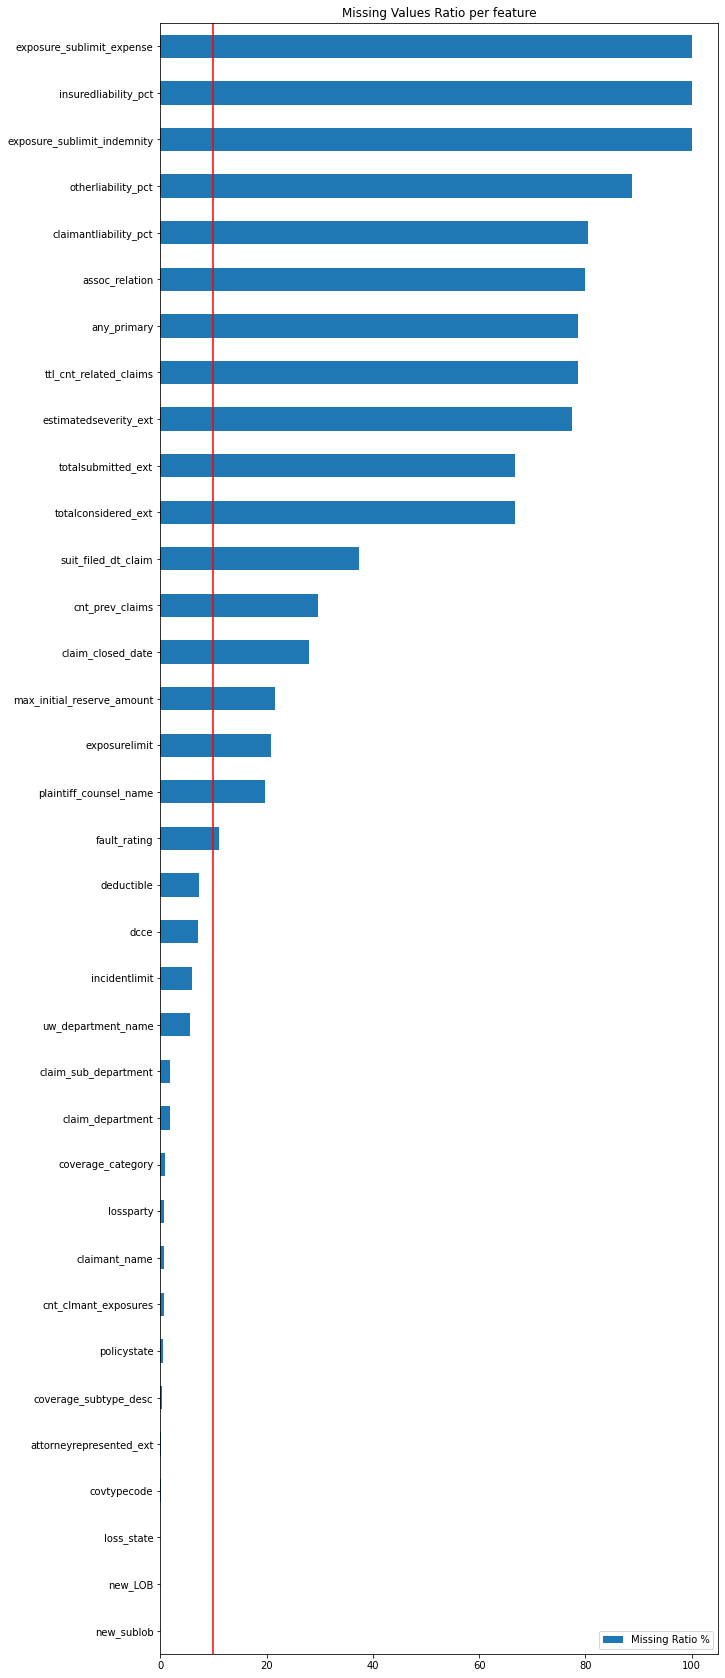

total columns with missing (35, 1)

In [0]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() > 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=True)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(10,30))
        plt.axvline(x=10, color='r')
        plt.title('Missing Values Ratio per feature')
        plt.show()
        print('total columns with missing ', missing_data.shape)
        
    else:
        print('No NAs found')
        
plot_nas(df2)

In [0]:
#numeric features
num_val = [
'high_exposure_flag', 
'log_initial_reserves_norm',
'log_demand_norm'
]

#categorical features
cat_val = ['claim_department',
'business_unit',
'uw_department_name', 
'policystate',
'fault_rating',
'col_category',
'policy_type',
'lossparty']

# features for filtering
filter_val = ['claim_sub_department', 'loss_state', 'loss_cause_desc', 'loss_type', 'coverage_category']


In [0]:
# getting all features in one list
claim_features = num_val + cat_val + filter_val + ['claim_number'] + ['claim_status']
claim_features = list(set(claim_features))

# dropping duplicates on claim_number + features level
sub_df = df2[claim_features].drop_duplicates()
sub_df.reset_index(inplace=True, drop=True)

# filling null values in a column
sub_df['fault_rating'].fillna('Fault Unknown/Pending', inplace = True)

# filtering null values
sub_df = sub_df[sub_df['uw_department_name'].isnull()==False]
sub_df = sub_df[sub_df['policystate'].isnull()==False]
sub_df = sub_df[sub_df['col_category'].isnull()==False]
sub_df = sub_df[sub_df['coverage_category'].isnull()==False]
sub_df = sub_df[sub_df['loss_state'].isnull()==False]
sub_df = sub_df[sub_df['claim_sub_department'].isnull()==False]

# resetting index
sub_df.reset_index(inplace=True, drop=True)

# creating Score DF with Dummies transformation for Categorical
score_df = sub_df[num_val].join(pd.get_dummies(sub_df[cat_val]))
score_df

Out[7]:

,high_exposure_flag,log_initial_reserves_norm,log_demand_norm,claim_department_Alternative Ventures,claim_department_Brokerage,claim_department_Contract,claim_department_Invalid Policy,claim_department_MLS,business_unit_E&SS - Contract,business_unit_E&SS - Individual Risk Brokerage,business_unit_E&SS - MLS Brokerage,business_unit_E&SS - Other,business_unit_E&SS - Programs,uw_department_name_0000B,uw_department_name_0000U,uw_department_name_Brokerage Casualty,uw_department_name_Brokerage Excess,uw_department_name_Brokerage Programs,uw_department_name_Brokerage Property,uw_department_name_Commercial D&O,uw_department_name_Commercial E&O,uw_department_name_Contract Commercial Package,uw_department_name_Contract Excess,uw_department_name_Financial Institutions D&O,uw_department_name_K&K Program,uw_department_name_MLS Programs,uw_department_name_Medical Professional Liability,uw_department_name_Non-Medical Professional Liability,uw_department_name_Personal Lines,uw_department_name_Public Entity P&C,uw_department_name_Transportation,policystate_AK,policystate_AL,policystate_AR,policystate_AZ,policystate_CA,policystate_CO,policystate_CT,policystate_DC,policystate_DE,...,col_category_Assault or Battery,col_category_Breach of Contract,col_category_Cargo Damage,col_category_Civil Authority or Excessive Force,col_category_Collision or Crash,col_category_Construction Defect,col_category_Contamination or Pollution,col_category_Cyber,col_category_Damage or Injury at Sea,col_category_E&O,col_category_Emotional or Physical Distress due to Discrimination or Privacy Violation,col_category_Equipment Breakdown,col_category_Explosion,col_category_Fall/Slip/Trip Injury,col_category_Falling/Moving/Flying Object,col_category_Fire or Smoke,col_category_Habitability,col_category_Infectious Disease,col_category_Malicious Mischief or Vandalism,col_category_Negligence or Improper Procedure,col_category_Other,col_category_Power Outage or Surge,col_category_Product or Design Failure,col_category_Professional Misconduct,col_category_Sexual Assault or Harrassment,col_category_Theft,col_category_Water Damage (Non-Weather),col_category_Weather Related Damage,policy_type_Commercial Umbrella,policy_type_Dwelling Fire,policy_type_Excess Liability,policy_type_Farmowner's,policy_type_Homeowners,policy_type_Liability,policy_type_Ocean Marine,policy_type_Package,policy_type_Personal Inland Marine,policy_type_Transportation,lossparty_Insured's loss,lossparty_Third-party liability
0,1.0,0.459332,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.0,0.540697,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1.0,0.500012,0.514896,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1.0,0.459332,0.514896,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,0.635174,0.000000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45577,1.0,0.500012,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
45578,1.0,0.486915,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,

In [0]:
from math import *
from decimal import Decimal
from scipy.spatial.distance import hamming


class Similarity():
  
  """ 3 similarity measures function """
  
  def euclidean_distance(self,x,y):
    """ return euclidean distance between two lists """
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
  def cosine_similarity(self,x,y):
    """ return cosine similarity between two lists """
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = self.square_rooted(x)*self.square_rooted(y)
    return round(numerator/float(denominator),3)
  
  def square_rooted(self,x):
    """ return 3 rounded square rooted value """
    return round(sqrt(sum([a*a for a in x])),3)
 
  def hamming_similarity(self,x,y):
    """ returns the Hamming similarity between two lists"""
    return hamming(x,y)
    
  def jaccard_similarity(self,x,y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

In [0]:
# Example of how Similarity functions work
measures = Similarity()

print('prod===================')
print(measures.euclidean_distance(score_df.iloc[0,:],score_df.iloc[2,:]))
print(measures.jaccard_similarity(score_df.iloc[0,:],score_df.iloc[2,:]))
print('cosine', measures.cosine_similarity(score_df.iloc[0,:],score_df.iloc[2,:]))
print('hamming', 1-measures.hamming_similarity(score_df.iloc[0,:],score_df.iloc[2,:]))

#!!! example claim and most similar example for each similarity metric and least similar

prod===================
2.5033521924438977
0.4
cosine 0.665
hamming 0.9402985074626866

In [0]:
from sklearn.metrics import pairwise_distances

# Cosine Similarity - closer to 1 is the same, 0 - different
cosine_sim_matrix = np.round(1-pairwise_distances(score_df, metric="cosine"),4)
cosine_sim_matrix

Out[12]: array([[1. , 0.9997, 0.6654, ..., 0.5677, 0.5666, 0.6754],
 [0.9997, 1. , 0.6668, ..., 0.5701, 0.5685, 0.6772],
 [0.6654, 0.6668, 1. , ..., 0.561 , 0.6662, 0.7732],
 ...,
 [0.5677, 0.5701, 0.561 , ..., 1. , 0.4612, 0.5701],
 [0.5666, 0.5685, 0.6662, ..., 0.4612, 1. , 0.8921],
 [0.6754, 0.6772, 0.7732, ..., 0.5701, 0.8921, 1. ]])

In [0]:
# Hamming Similarity measurement
hamming_sim_matrix = np.round(1 - pairwise_distances(score_df, metric="hamming"),4)
hamming_sim_matrix


Out[13]: array([[1. , 0.9925, 0.9403, ..., 0.9328, 0.9328, 0.9478],
 [0.9925, 1. , 0.9403, ..., 0.9328, 0.9328, 0.9552],
 [0.9403, 0.9403, 1. , ..., 0.9254, 0.9478, 0.9552],
 ...,
 [0.9328, 0.9328, 0.9254, ..., 1. , 0.9179, 0.9328],
 [0.9328, 0.9328, 0.9478, ..., 0.9179, 1. , 0.9776],
 [0.9478, 0.9552, 0.9552, ..., 0.9328, 0.9776, 1. ]])

In [0]:
# aggregating results by averaging cosine and hamming score
final_score_matrix = 0.5*hamming_sim_matrix+0.5*cosine_sim_matrix

Out[16]:

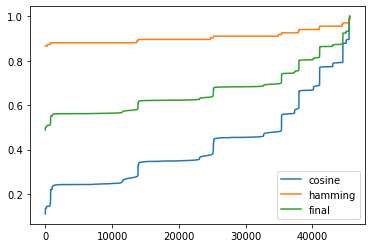

<matplotlib.legend.Legend at 0x7f5f360939d0>

In [0]:
# Plot of scores distributions
i = 16
plt.plot(np.sort(cosine_sim_matrix[i]), label = 'cosine')
plt.plot(np.sort(hamming_sim_matrix[i]), label = 'hamming')
plt.plot(np.sort(final_score_matrix[i]), label = 'final')
plt.legend()

In [0]:
# assignin Claim Number to corresponding vector with similarities
cosine_sim = pd.DataFrame(final_score_matrix)
cosine_sim.columns = sub_df['claim_number'].astype('str')
cosine_sim.index = sub_df['claim_number']

cosine_sim

Out[17]:

claim_number,01745456,01745456,01749727,01749727,01750165,01751610,01751610,01750713,01751769,01751820,01751829,01752180,01753253,01753253,01754368,01754251,01754820,01754820,01754820,01754980,01755506,01755406,01756674,01756674,01757095,01757095,01757178,01757178,01757178,01757386,01757386,01758649,01758649,01759073,01759101,01759101,01760072,01760944,01760613,01760914,...,02069663,02070794,02071251,02071788,02072901,02073129,02073435,02076604,02076604,02077977,02079769,02079769,02079769,02080957,02080957,02081987,02082420,02082646,02083308,02083310,02084234,02084473,02085359,02085897,02087401,02087401,02087408,02091610,02094015,02094619,02094957,02095223,02095925,02096850,02099362,02099476,02100197,02100197,02100732,02100732
claim_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01745456,1.00000,0.99610,0.80285,0.74530,0.62835,0.68855,0.68865,0.56570,0.62810,0.56785,0.62050,0.62715,0.74090,0.80495,0.68790,0.87310,0.68105,0.68075,0.61980,0.80285,0.93460,0.56650,0.80100,0.86265,0.80145,0.86205,0.74310,0.74325,0.74270,0.75070,0.75085,0.74280,0.74350,0.86785,0.62000,0.68125,0.81160,0.62645,0.62705,0.62120,...,0.62705,0.62715,0.62705,0.62715,0.57650,0.81095,0.57650,0.75010,0.75045,0.62715,0.87300,0.87300,0.81135,0.81165,0.81055,0.69055,0.64115,0.62715,0.62715,0.86650,0.57650,0.81180,0.62880,0.68900,0.74970,0.81165,0.87310,0.62715,0.68805,0.87295,0.81170,0.68865,0.62740,0.81195,0.62885,0.74970,0.74955,0.75025,0.74970,0.81160
01745456,0.99610,1.00000,0.80355,0.74235,0.63035,0.69365,0.69005,0.56755,0.63000,0.57020,0.62200,0.62880,0.74180,0.80175,0.68905,0.87380,0.68235,0.68195,0.62115,0.80395,0.93495,0.56855,0.80130,0.86705,0.80215,0.86255,0.74445,0.74465,0.74750,0.75220,0.75255,0.74375,0.74480,0.86440,0.62160,0.68295,0.81620,0.62785,0.63235,0.62285,...,0.63235,0.62880,0.63235,0.62880,0.57850,0.81145,0.57850,0.75125,0.75180,0.62880,0.87420,0.87420,0.81205,0.81255,0.81085,0.69285,0.64285,0.62880,0.62880,0.86675,0.57850,0.81295,0.63095,0.69055,0.75065,0.81260,0.87380,0.62880,0.68925,0.87345,0.81270,0.69005,0.62910,0.81340,0.63100,0.75065,0.75045,0.75145,0.75065,0.81620
01749727,0.80285,0.80355,1.00000,0.93610,0.62310,0.62165,0.62175,0.62175,0.62280,0.62370,0.69295,0.62175,0.81675,0.87255,0.62075,0.80360,0.69315,0.69655,0.63270,0.81335,0.80345,0.56205,0.75190,0.81325,0.81680,0.87655,0.75315,0.75335,0.75270,0.74380,0.74405,0.81575,0.81255,0.81190,0.63475,0.69525,0.86420,0.62470,0.62165,0.57745,...,0.62165,0.62175,0.62165,0.62175,0.57200,0.86360,0.57200,0.74300,0.74345,0.62175,0.80420,0.80420,0.74620,0.74300,0.74130,0.62490,0.57200,0.62175,0.62175,0.81005,0.57200,0.80390,0.62365,0.62230,0.80700,0.86425,0.80360,0.62175,0.68545,0.80700,0.74320,0.68235,0.62205,0.86440,0.62370,0.74620,0.74235,0.74320,0.80700,0.86420
01749727,0.74530,0.74235,0.93610,1.00000,0.56170,0.68155,0.68165,0.56025,0.56135,0.56235,0.63230,0.56025,0.87255,0.81610,0.68090,0.74240,0.63255,0.63220,0.69210,0.75305,0.74220,0.50045,0.81180,0.75295,0.87255,0.81270,0.69260,0.69275,0.69205,0.80340,0.80345,0.75135,0.75200,0.75500,0.69365,0.63500,0.80310,0.55940,0.56010,0.51655,...,0.56010,0.56025,0.56010,0.56025,0.50710,0.80245,0.50710,0.68165,0.68215,0.56025,0.74315,0.74320,0.80285,0.68165,0.67980,0.56375,0.50710,0.56025,0.56025,0.74915,0.50710,0.74275,0.56230,0.56080,0.86370,0.80315,0.74240,0.56025,0.62025,0.74200,0.80320,0.62095,0.56050,0.80345,0.56235,0.68110,0.68090,0.68185,0.86370,0.80310
01750165,0.62835,0.63035,0.62310,0.56170,1.00000,0.50840,0.50865,0.56960,0.87485,0.57285,0.62355,0.81330,0.56230,0.62140,0.50680,0.63050,0.56325,0.56265,0.50200,0.62505,0.62995,0.63155,0.55980,0.62355,0.56230,0.62235,0.62550,0.62595,0.62430,0.57555,0.57275,0.62360,0.62555,0.62235,0.50350,0.56550,0.63035,0.87365,0.87415,0.56450,...,0.93510,0.81330,0.69130,0.81330,0.83685,0.62800,0.83685,0.63050,0.63160,0.87420,0.63320,0.63335,0.56830,0.63050,0.62695,0.63520,0.77285,0.81330,0.75235,0.62325,0.64470,0.63155,0.87525,0.87455,0.56830,0.63065,0.63050,0.87420,

In [0]:
# vector of claims to test - to see how the like claims look like
first_check = ['01744947','01480338','01443794', '01924197', '02028039', '02047183', '02071721', '01869120', '02076396', '01871001', '01942248', '02012563']



In [0]:
#iterator for first check list to build a list of like claims for them
i = 0

# define filters/segment for the current target claim
filters = sub_df.loc[sub_df['claim_number']==first_check[i],['loss_state','loss_type', 'coverage_category', 'loss_cause_desc','claim_sub_department']].drop_duplicates()

# filter subset of claim numbers that belong to the defined above segment
ids = sub_df[(sub_df['loss_type']==filters['loss_type'].values[0])
             &(sub_df['loss_state']==filters['loss_state'].values[0])          # -- comment any filter if you want to waive it
             &(sub_df['claim_sub_department']==filters['claim_sub_department'].values[0])
             &(sub_df['loss_cause_desc']==filters['loss_cause_desc'].values[0])
             &(sub_df['coverage_category']==filters['coverage_category'].values[0])
            ]['claim_number'].values

# Subselecting similarity scores for claim numbers in the segment
segment_similarity = cosine_sim.loc[ids,ids]
rating = segment_similarity.loc[first_check[i],:]

# aggregation 1 - if we have multiple columns for target claim we average the similarities to have a single vector
if len(rating.shape) > 1:
  rating = rating.mean()

# sorting targeted similarities
rating = rating.sort_values()

# droping duplicates for the claim and features in the list
id_1 = rating.index
tmp = df[df['claim_number'].isin(id_1)][['claim_number',
                                          'loss_state', 'coverage_category', 'claim_year', 'policystate', 'claim_is_closed', 'loss_type', 'max_demand', 'max_initial_reserve_amount', 'dcce', 'claim_sub_department', 'loss_cause_desc',  'development_time', 'time_between_suit_close', 'days_open']].drop_duplicates()

# if multiple records we calculate average similarity score for all of them and assign to corresponding pair of claims
tmp['similarity_score'] = tmp['claim_number'].apply(lambda x: rating.loc[x].mean())

# age penalty - penalize each year ~5% 
tmp['similarity_score_adjusted'] = [np.round(0.95**max(0, int(tmp[tmp['claim_number']==first_check[i]]['claim_year'].max()) - int(tmp.loc[ind,'claim_year']))*tmp.loc[ind,'similarity_score'], 4) for ind in tmp.index] 

# Applying filters and sorting the final list of like claims. Top 10 
tmp = tmp[(tmp['loss_type']==filters['loss_type'].values[0])
             &(tmp['loss_state']==filters['loss_state'].values[0])          # -- comment any filter if you want to waive it
             &(tmp['claim_sub_department']==filters['claim_sub_department'].values[0])
             &(tmp['loss_cause_desc']==filters['loss_cause_desc'].values[0])
             &(tmp['coverage_category']==filters['coverage_category'].values[0])
            ]

tmp.sort_values(by='similarity_score_adjusted', ascending=False).drop_duplicates()[:11].display()


claim_number,loss_state,coverage_category,claim_year,policystate,claim_is_closed,loss_type,max_demand,max_initial_reserve_amount,dcce,claim_sub_department,loss_cause_desc,development_time,time_between_suit_close,days_open,similarity_score,similarity_score_adjusted
01965671,NV,Financial Damage,2020,NV,1,Liability,0.0,null,null,E Risk,FSPGM - Directors and Officers Error or Omission,175,-1,909,1.0,1.0
01892346,NV,Financial Damage,2019,NV,1,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,757,826,1316,1.0,1.0
01756175,NV,Financial Damage,2017,NV,1,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,1240,1260,2095,1.0,1.0
01744947,NV,Financial Damage,2017,NV,1,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,497,510,2171,1.0,1.0
02034107,NV,Financial Damage,2021,NV,0,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,-1,-1,548,0.9686,0.9686
01849111,NV,Financial Damage,2018,NV,0,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,-1,-1,1553,0.9388,0.9388
02002802,NV,Financial Damage,2020,NV,0,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,-1,-1,723,0.9388,0.9388
01891784,NV,Financial Damage,2019,NV,1,Liability,0.0,90000.0,0.07870896416177871,E Risk,FSPGM - Directors and Officers Error or Omission,635,726,1318,0.9351,0.9351
02027056,NV,Financial Damage,2021,CA,0,Liability,0.0,null,1.0,E Risk,FSPGM - Directors and Officers Error or Omission,-1,-1,593,0.87755,0.8776


In [0]:
# getting the above approach for one target claim into a function in order to apply for all claims in the table.

def single_like_claims(sub_df, target_claim_id):
  # defining filters for the target claims
  filters = sub_df.loc[sub_df['claim_number']==target_claim_id,['claim_sub_department', 'loss_state', 'coverage_category', 'loss_cause_desc','loss_type']].drop_duplicates()
  
  result = pd.DataFrame()
  
  for f in range(filters.shape[0]):
    ids = sub_df[(sub_df['loss_type']==filters['loss_type'].values[0])
             &(sub_df['loss_state']==filters['loss_state'].values[0])          # -- comment any filter if you want to waive it
             &(sub_df['claim_sub_department']==filters['claim_sub_department'].values[0])
             &(sub_df['loss_cause_desc']==filters['loss_cause_desc'].values[0])
             &(sub_df['coverage_category']==filters['coverage_category'].values[0])
            ]['claim_number'].values
    if len(ids)>0:
      segment_similarity = cosine_sim.loc[ids,ids]

      rating = segment_similarity.loc[target_claim_id,:]
      if len(rating.shape)>1:
        rating = rating.mean()

      id_1 = rating.index
      tmp = df[df['claim_number'].isin(id_1)][['claim_number', #'exposure_id', 'matter_id', 
                                               'claim_sub_department', 'loss_state', 'coverage_category', 'claim_year', 'policystate',
                                               'claim_is_closed', 'loss_type', 'loss_cause_desc', 'max_demand', 'max_initial_reserve_amount','dcce',  'development_time', 'time_between_suit_close', 'days_open']].drop_duplicates()

      # if multiple records we calculate average similarity score for all of them and assign to corresponding pair of claims
      tmp['similarity_score'] = tmp['claim_number'].apply(lambda x: rating.loc[x].mean())

      # age penalty 
      tmp['similarity_score_adjusted'] = [np.round(0.95**max(0, int(tmp[tmp['claim_number']==target_claim_id]['claim_year'].max()) - int(tmp.loc[ind,'claim_year']))*tmp.loc[ind,'similarity_score'], 4) for ind in tmp.index] 

      # aplying filters to the final recommendations
      tmp = tmp[(tmp['loss_type']==filters['loss_type'].values[0])
             &(tmp['loss_state']==filters['loss_state'].values[0])          # -- comment any filter if you want to waive it
             &(tmp['claim_sub_department']==filters['claim_sub_department'].values[0])
             &(tmp['loss_cause_desc']==filters['loss_cause_desc'].values[0])
             &(tmp['coverage_category']==filters['coverage_category'].values[0])
                  ]

      # select top 10 most similar claimes
      if len(tmp)>0:
        like_claims = tmp.sort_values(by='similarity_score_adjusted', ascending=False).drop_duplicates()[:11]
        like_claims = like_claims[like_claims['claim_number']!=target_claim_id]
        Like_claims = like_claims.iloc[:10,:]

        like_claims['target_claim_id'] = target_claim_id

        # adding to result
        result = result.append(like_claims)
      
    else:
      continue
      
  
  return result


In [0]:
# Loop through each claim number and compose a table with assigned like claims
intermediate_table = pd.DataFrame()
cnt = 0

for target_claim in sub_df['claim_number'].drop_duplicates().values:
  # just a counter to monitor the progress
  cnt+=1
  if cnt%500 == 0:
    print(cnt)
    
  t = single_like_claims(sub_df, target_claim)
  intermediate_table = intermediate_table.append(t, ignore_index = True)

# save the table into your databricks workspace after finishing the process
intermediate_table.to_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/intermediate_table2.csv')


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000

In [0]:
# if you have data here you can skip the above section (it takes ~7 hours to complete)
intermediate_table = pd.read_csv('/dbfs/FileStore/shared_uploads/onyshi1@nationwide.com/intermediate_table.csv')
del intermediate_table['Unnamed: 0']


In [0]:
# Final Stage: Aggregating to claim - claim level ignoring filters
final_table = intermediate_table.groupby(['target_claim_id', 'claim_number']).agg({'target_claim_id': np.max, 'claim_number': np.max, 'similarity_score_adjusted': np.mean})
final_table.reset_index(drop=True, inplace = True)

# rank by similarity score, group by target_claim
final_table['overall_rank'] = final_table.groupby('target_claim_id')['similarity_score_adjusted'].rank(method='first', ascending = False)

# filter only pairs with rank <=10 - Top 10 Like Claims
result = final_table[final_table['overall_rank']<=10]

result


Out[25]:

,target_claim_id,claim_number,similarity_score_adjusted,overall_rank
0,1205462,01800634,0.8516,1.0
1,1205469,01212546,0.9064,1.0
2,1205469,01679201,0.8777,2.0
3,1205469,01797596,0.8017,3.0
4,1205680,01207012,0.9061,2.0
...,...,...,...,...
285452,W1019191,01830777,0.6670,6.0
285453,W1019191,01841243,0.6944,4.0
285454,W1019191,01882408,0.8817,1.0
285455,W1019191,01915316,0.8151,2.0
